In [56]:
import pandas as pd
import numpy as np

In [57]:
from google.colab import files
uploaded=files.upload()

Saving book.csv to book (2).csv


In [58]:
book=pd.read_csv('book.csv', encoding='ISO-8859-1')
book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [59]:
book=book.rename({'Unnamed: 0':'Index', 'User.ID':'User_ID','Book.Title':'Book_Title','Book.Rating':'Book_Rating'}, axis=1)
book.head()

,Index,User_ID,Book_Title,Book_Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [60]:
book.drop('Index', axis=1, inplace=True)

In [61]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_ID      10000 non-null  int64 
 1   Book_Title   10000 non-null  object
 2   Book_Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [62]:
dupli=book.duplicated()
print(book[dupli])

      User_ID                 Book_Title  Book_Rating
5051     2152  Le nouveau soleil de Teur            7
7439     3757        The Magician's Tale            7


In [63]:
book_new=book.drop_duplicates()

In [64]:
book_new.shape

(9998, 3)

In [65]:
book_new['Book_Rating'].value_counts()

8     2283
7     2074
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book_Rating, dtype: int64

In [66]:
book_new['User_ID'].value_counts()

3757      522
162052    214
2276      212
4017      156
277427    150
         ... 
969         1
967         1
965         1
951         1
162129      1
Name: User_ID, Length: 2182, dtype: int64

In [67]:
book_new['Book_Title'].value_counts()

Fahrenheit 451                                              5
Stardust                                                    4
The Amber Spyglass (His Dark Materials, Book 3)             4
Ender's Game (Ender Wiggins Saga (Paperback))               4
The Subtle Knife (His Dark Materials, Book 2)               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Book_Title, Length: 9659, dtype: int64

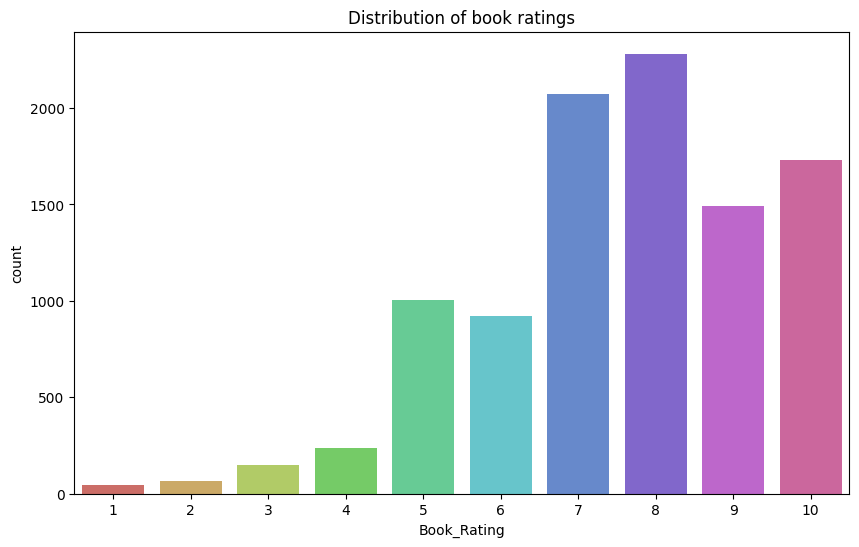

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
palette = sns.color_palette("hls", 10)
sns.countplot(x='Book_Rating', data=book_new, palette=palette)
ax.set_title('Distribution of book ratings')

plt.show()

In [69]:
user_books_df = book_new.pivot_table(index='User_ID', columns='Book_Title', values='Book_Rating').reset_index(drop=True).fillna(0)
user_books_df.index=book_new.User_ID.unique()
user_books_df

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**COSINE SIMILARITY**

In [70]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

In [71]:
user_sim = 1 - pairwise_distances( user_books_df.values,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [72]:
np.fill_diagonal(user_sim, 0)

In [73]:
user_sim_df=pd.DataFrame(user_sim)

user_sim_df.index=book['User_ID'].unique()
user_sim_df.columns=book['User_ID'].unique()

In [74]:
user_sim_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
print(user_sim_df.idxmax(axis=1)[3757])
print(user_sim_df.max(axis=1).sort_values(ascending=False).head(50))

276726
1775      1.000000
278160    1.000000
3350      1.000000
161458    1.000000
278620    1.000000
92        1.000000
3944      1.000000
161390    1.000000
3619      1.000000
161361    1.000000
161343    1.000000
3293      1.000000
277353    1.000000
277351    1.000000
2203      1.000000
277601    1.000000
277945    1.000000
367       1.000000
3538      1.000000
1782      1.000000
2883      1.000000
277958    0.752577
3462      0.707107
276820    0.707107
161951    0.668965
3473      0.668965
3910      0.662266
161480    0.662266
161443    0.613941
161232    0.613941
1368      0.549972
4226      0.549972
4203      0.515325
4228      0.515325
3506      0.502571
3896      0.502571
161922    0.500000
161119    0.498464
278637    0.498464
277205    0.495904
1650      0.495904
161225    0.476290
3402      0.476290
291       0.463241
2074      0.463241
1859      0.453638
2045      0.453638
277820    0.437426
4301      0.437426
3111      0.384900
dtype: float64


**User ID '3757' has the highest correlation with User ID '276726'**

In [76]:
book_new[book_new['User_ID']==3757]

,User_ID,Book_Title,Book_Rating
6998,3757,The Strange Case of Dr. Jekyll and Mr. Hyde an...,7
6999,3757,Almost Vegetarian : A Primer for Cooks Who Are...,8
7000,3757,The Adventures of Buckaroo Banzai : Across the...,6
7001,3757,A General Theory of Love,7
7002,3757,"The Best American Essays, 1989 (Best American ...",7
...,...,...,...
7516,3757,What Happened When: A Chronology of Life and E...,9
7517,3757,Catching Alice,7
7518,3757,Ella Minnow Pea: A Novel in Letters,7
7519,3757,Dave's Way: A New Approach to Old-Fashioned Su...,8


In [77]:
book_new[book_new['User_ID']==276726]

,User_ID,Book_Title,Book_Rating
0,276726,Classical Mythology,5


In [78]:
def get_recomendations(user_1, user_2):
  common_books=book_new[book_new['User_ID']==user_1].merge(book_new[book_new['User_ID']==user_2], on='Book_Rating', how='inner')
  return common_books.merge(book_new, on='Book_Rating')

In [79]:
common_books=get_recomendations(3757, 276726)
common_books

,User_ID_x,Book_Title_x,Book_Rating,User_ID_y,Book_Title_y,User_ID,Book_Title
0,3757,Playing in the Dark: Whiteness and the Literar...,5,276726,Classical Mythology,276726,Classical Mythology
1,3757,Playing in the Dark: Whiteness and the Literar...,5,276726,Classical Mythology,276755,The Witchfinder (Amos Walker Mystery Series)
2,3757,Playing in the Dark: Whiteness and the Literar...,5,276726,Classical Mythology,276762,Goodbye to the Buttermilk Sky
3,3757,Playing in the Dark: Whiteness and the Literar...,5,276726,Classical Mythology,276796,Tage der Unschuld.
4,3757,Playing in the Dark: Whiteness and the Literar...,5,276726,Classical Mythology,276798,Lying Awake
...,...,...,...,...,...,...,...
17114,3757,The Society of Friends: Stories,5,276726,Classical Mythology,162063,Five Quarters of the Orange
17115,3757,The Society of Friends: Stories,5,276726,Classical Mythology,162085,To Asmara
17116,3757,The Society of Friends: Stories,5,276726,Classical Mythology,162092,Cherry
17117,3757,The Society of Friends: Stories,5,276726,Classical Mythology,162092,Tending to Virginia
